In [78]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [79]:
food_cost = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Restaurant_food_cost/Data_Train.csv", encoding = "ISO-8859-1", engine='python')
food_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [80]:
food_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [81]:
food_cost.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [82]:
food_cost = food_cost.dropna()
food_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [83]:
food_cost[['No. of Votes','N/A']] = food_cost.VOTES.str.split(" ",expand=True)
food_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,No. of Votes,N/A
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,24,votes
4,DESSERT PARLOR,15387,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,165,votes
...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500,546,votes
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800,1214,votes
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,608 votes,1300,608,votes
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400,32,votes


In [84]:
food_cost.drop('VOTES', axis = 1, inplace = True)
food_cost.drop('N/A', axis = 1, inplace = True)
food_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,DESSERT PARLOR,15387,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,165
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,546
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,1214
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,1300,608
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32


Dropping rastaurant ID column since it's just an identifier and nothing to do with cost

In [85]:
food_cost.drop('RESTAURANT_ID', axis = 1, inplace = True)

In [86]:
food_cost

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,CASUAL DINING,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,221
3,QUICK BITES,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,DESSERT PARLOR,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,546
12686,"CASUAL DINING,BAR","Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,1214
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,1300,608
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32


In [87]:
l = LabelEncoder()
food_cost['TITLE'] = l.fit_transform(food_cost['TITLE'])
food_cost

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,29,"Malwani, Goan, North Indian","11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,31,"Asian, Modern Indian, Japanese",6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,29,"North Indian, Chinese, Biryani, Hyderabadi","11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,221
3,93,"Tibetan, Chinese",11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,48,Desserts,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,93,"North Indian, Burger, Kebab","12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,546
12686,31,"Goan, Continental","12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,1214
12687,69,"Finger Food, Continental, Asian, Chinese",12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,1300,608
12688,29,"North Indian, South Indian, Chinese, Street Food",6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32


In [88]:
l = LabelEncoder()
food_cost['CUISINES'] = l.fit_transform(food_cost['CUISINES'])
food_cost

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,29,2463,"11am - 4pm, 7:30pm - 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200,49
1,31,275,6pm - 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500,30
2,29,2800,"11am - 3:30pm, 7pm - 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800,221
3,93,3893,11:30am - 1am (Mon-Sun),Mumbai,Bandra West,4.1,800,24
4,48,1663,11am - 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,93,2758,"12noon - 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500,546
12686,31,2017,"12noon - 1am (Mon-Fri),11am - 5pm, 7pm - 1am...",Mumbai,Bandra Kurla Complex,4.3,1800,1214
12687,69,1963,12noon - 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,1300,608
12688,29,3305,6am - 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400,32


In [89]:
l = LabelEncoder()
food_cost['TIME'] = l.fit_transform(food_cost['TIME'])
food_cost

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,29,2463,700,Thane,Dombivali East,3.6,1200,49
1,31,275,1799,Chennai,Ramapuram,4.2,1500,30
2,29,2800,623,Chennai,Saligramam,3.8,800,221
3,93,3893,257,Mumbai,Bandra West,4.1,800,24
4,48,1663,581,Mumbai,Lower Parel,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,93,2758,1093,Hyderabad,Gachibowli,3.8,500,546
12686,31,2017,1125,Mumbai,Bandra Kurla Complex,4.3,1800,1214
12687,69,1963,1086,Navi Mumbai,Vashi,4,1300,608
12688,29,3305,1754,Chennai,Maduravoyal,3.5,400,32


In [90]:
l = LabelEncoder()
food_cost['LOCALITY'] = l.fit_transform(food_cost['LOCALITY'])
food_cost['CITY'] = l.fit_transform(food_cost['CITY'])
food_cost

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,No. of Votes
0,29,2463,700,300,267,3.6,1200,49
1,31,275,1799,63,961,4.2,1500,30
2,29,2800,623,63,1015,3.8,800,221
3,93,3893,257,206,128,4.1,800,24
4,48,1663,581,206,573,3.8,300,165
...,...,...,...,...,...,...,...,...
12685,93,2758,1093,125,318,3.8,500,546
12686,31,2017,1125,206,125,4.3,1800,1214
12687,69,1963,1086,223,1241,4,1300,608
12688,29,3305,1754,63,584,3.5,400,32


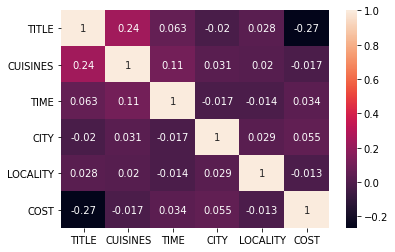

In [91]:
sns.heatmap(food_cost.corr(), annot = True)

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
Y = food_cost["COST"]
X = food_cost.drop('COST', axis = 1)

In [94]:
Y = Y.values.reshape(-1,1)
Y.shape

(11393, 1)

In [95]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6
0,-0.865376,0.313269,-0.581754,2.118784,-0.919750,-0.436802,-0.435256
1,-0.803425,-1.610213,0.973802,-0.868996,0.968266,0.985390,-0.457729
2,-0.865376,0.609527,-0.690742,-0.868996,1.115172,0.037262,-0.231820
3,1.117063,1.570389,-1.208789,0.933758,-1.297897,0.748358,-0.464825
4,-0.276839,-0.390015,-0.750190,0.933758,-0.087282,0.037262,-0.298055
...,...,...,...,...,...,...,...
11388,1.117063,0.572605,-0.025490,-0.087382,-0.781005,0.037262,0.152580
11389,-0.803425,-0.078812,0.019803,0.933758,-1.306059,1.222422,0.942669
11390,0.373649,-0.126284,-0.035398,1.148071,1.730001,0.511326,0.225912
11391,-0.865376,1.053475,0.910108,-0.868996,-0.057357,-0.673834,-0.455363


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 90)
print(Y_train.shape, Y_test.shape)

(9114, 1) (2279, 1)


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# LinearRegression

In [99]:
lnr = LinearRegression()
lnr.fit(X_train, Y_train)

LinearRegression()

In [100]:
lnr_pred = lnr.predict(X_test)
lnr_pred

array([[377.8789907 ],
       [920.03399596],
       [584.0683705 ],
       ...,
       [468.32462725],
       [295.0183208 ],
       [694.17860302]])

In [101]:
lnr_accuracy = round(lnr.score(X_train, Y_train)*100)
lnr_accuracy

17.0

In [102]:
print('Mean absolute error:', mean_absolute_error(Y_test, lnr_pred))
print('Mean squared error:', mean_squared_error(Y_test, lnr_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, lnr_pred)))
print('R2 score is:', r2_score(Y_test, lnr_pred))

Mean absolute error: 344.59857320723296
Mean squared error: 332246.9724893356
Root Mean squared error: 576.408685300053
R2 score is: 0.17221848659976335


# DecisionTree

In [103]:
tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_pred

array([415.95092025, 638.84297521, 415.95092025, ..., 468.75      ,
       359.05172414, 514.70588235])

In [104]:
tree_accuracy = round(tree.score(X_train, Y_train)*100)
tree_accuracy

65.0

In [105]:
print('Mean absolute error:', mean_absolute_error(Y_test, tree_pred))
print('Mean squared error:', mean_squared_error(Y_test, tree_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, tree_pred)))
print('R2 score is:', r2_score(Y_test, tree_pred))

Mean absolute error: 228.2139987703972
Mean squared error: 154435.95744553622
Root Mean squared error: 392.98340606892833
R2 score is: 0.6152283055587997


# RandomForestRegressor

In [106]:
rf = RandomForestRegressor(n_estimators = 400, max_depth = 6, min_samples_leaf = 100, n_jobs = 4)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([386.78202273, 697.3602554 , 404.87444928, ..., 480.40536855,
       386.15981465, 675.49675134])

In [107]:
rf_accuracy = round(rf.score(X_train, Y_train)*100)
rf_accuracy

61.0

In [108]:
print('Mean absolute error:', mean_absolute_error(Y_test, rf_pred))
print('Mean squared error:', mean_squared_error(Y_test, rf_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, rf_pred)))
print('R2 score is:', r2_score(Y_test, rf_pred))

Mean absolute error: 239.38140651062056
Mean squared error: 170072.8063223438
Root Mean squared error: 412.3988437451587
R2 score is: 0.5762696528099923


# XGBoost Regressor

In [109]:
xg = XGBRegressor(n_estimators = 1000, learning_rate = 0.3)
xg.fit(X_train, Y_train)
xg_pred = xg.predict(X_test)
xg_pred

array([310.2279 , 256.10815, 392.87027, ..., 376.74942, 414.0513 ,
       633.09875], dtype=float32)

In [110]:
xg_accuracy = round(xg.score(X_train, Y_train)*100)
xg_accuracy

100.0

In [111]:
print('Mean absolute error:', mean_absolute_error(Y_test, xg_pred))
print('Mean squared error:', mean_squared_error(Y_test, xg_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, xg_pred)))
print('R2 score is:', r2_score(Y_test, xg_pred))

Mean absolute error: 202.7372952988923
Mean squared error: 109259.9189874172
Root Mean squared error: 330.54488195616824
R2 score is: 0.7277827983931606


XGBoost Regressor performs better than other models

In [112]:
import pickle
filename = 'reastaurant_cost_xg.pkl'
pickle.dump(xg, open(filename, 'wb'))

In [113]:
food_cost_output = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Restaurant_food_cost/Data_Test.csv", encoding = "ISO-8859-1", engine='python')
food_cost_output

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon - 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am - 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am - 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am - 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am - 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am - 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am - 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am - 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am - 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [114]:
food_cost_output.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [115]:
food_cost_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [116]:
food_cost_output = food_cost_output.dropna()
food_cost_output

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon - 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am - 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am - 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am - 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am - 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am - 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4,197 votes
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am - 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am - 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am - 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes


In [117]:
food_cost_output[['No. of Votes','N/A']] = food_cost_output.VOTES.str.split(" ",expand=True)
food_cost_output

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,No. of Votes,N/A
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon - 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,564,votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am - 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,61,votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am - 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,350,votes
3,None,204,Biryani,"9am - 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,1445,votes
4,QUICK BITES,13453,"South Indian, Kerala",11am - 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,23,votes
...,...,...,...,...,...,...,...,...,...,...
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am - 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4,197 votes,197,votes
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am - 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,287,votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am - 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,469,votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am - 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,53,votes


In [118]:
food_cost_output.drop('VOTES', axis = 1, inplace = True)
food_cost_output.drop('N/A', axis = 1, inplace = True)
food_cost_output

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,No. of Votes
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon - 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am - 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am - 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,204,Biryani,"9am - 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,13453,"South Indian, Kerala",11am - 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...,...,...
4225,QUICK BITES,1670,"North Indian, Mughlai, Chinese","6am - 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4,197
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am - 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am - 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am - 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53


In [119]:
food_cost_output.drop('RESTAURANT_ID', axis = 1, inplace = True)
food_cost_output

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,No. of Votes
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon - 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am - 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am - 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,Biryani,"9am - 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",11am - 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...,...
4225,QUICK BITES,"North Indian, Mughlai, Chinese","6am - 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), ...",Mumbai,Grant Road,4,197
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am - 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am - 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,"Continental, North Indian",9:30am - 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53


In [120]:
l = LabelEncoder()
food_cost_output['TITLE'] = l.fit_transform(food_cost_output['TITLE'])
food_cost_output['CUISINES'] = l.fit_transform(food_cost_output['CUISINES'])
food_cost_output['TIME'] = l.fit_transform(food_cost_output['TIME'])
food_cost_output['CITY'] = l.fit_transform(food_cost_output['CITY'])
food_cost_output['LOCALITY'] = l.fit_transform(food_cost_output['LOCALITY'])
food_cost_output

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,No. of Votes
0,22,1210,480,103,619,4.3,564
1,73,1528,886,90,208,4.2,61
2,22,1368,206,90,388,3.8,350
3,64,190,1013,41,433,3.8,1445
4,73,1532,198,74,283,3.6,23
...,...,...,...,...,...,...,...
4225,73,1339,784,90,208,4,197
4226,22,1339,96,101,557,3.9,287
4227,64,246,249,9,224,4.3,469
4228,73,635,994,41,651,3.7,53


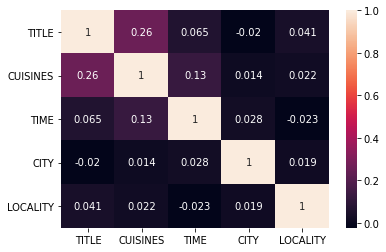

In [121]:
sns.heatmap(food_cost_output.corr(), annot = True)

In [122]:
from sklearn.preprocessing import StandardScaler

In [127]:
X_test = food_cost_output
X_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,No. of Votes
0,22,1210,480,103,619,4.3,564
1,73,1528,886,90,208,4.2,61
2,22,1368,206,90,388,3.8,350
3,64,190,1013,41,433,3.8,1445
4,73,1532,198,74,283,3.6,23
...,...,...,...,...,...,...,...
4225,73,1339,784,90,208,4,197
4226,22,1339,96,101,557,3.9,287
4227,64,246,249,9,224,4.3,469
4228,73,635,994,41,651,3.7,53


In [128]:
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test))
X_test

,0,1,2,3,4,5,6
0,-0.839739,0.718348,-0.040797,1.327489,1.181796,1.199813,0.159015
1,1.138472,1.396345,1.231801,0.968915,-0.685416,0.968782,-0.443943
2,-0.839739,1.055214,-0.899644,0.968915,0.132341,0.044661,-0.097512
3,0.789376,-1.456358,1.629879,-0.382634,0.336780,0.044661,1.215092
4,1.138472,1.404873,-0.924719,0.527593,-0.344684,-0.417400,-0.489495
...,...,...,...,...,...,...,...
3792,1.138472,0.993384,0.912084,0.968915,-0.685416,0.506721,-0.280917
3793,-0.839739,0.993384,-1.244436,1.272324,0.900124,0.275691,-0.173032
3794,0.789376,-1.336962,-0.764861,-1.265278,-0.612727,1.199813,0.045136
3795,1.138472,-0.507589,1.570324,-0.382634,1.327175,-0.186370,-0.453533


In [129]:
xg_pred = xg.predict(X_test)

In [130]:
xg_pred

array([1268.2769 ,  225.88678,  744.6975 , ..., 1284.6154 ,  246.42833,
        644.34576], dtype=float32)

In [131]:
cost_out = pd.DataFrame(data = xg_pred, columns = ['Cost_output'])
cost_out

,Cost_output
0,1268.276855
1,225.886780
2,744.697510
3,1515.816650
4,533.090027
...,...
3792,539.534424
3793,499.538574
3794,1284.615356
3795,246.428329
